# Examen de Cinturón

## Datos Personales

* **Nombre Completo**: Felipe Gonzalez Garrido
* **ID Coding Dojo**: 80479
* **Track**: ADVANCED MACHINE LEARNING V22.1
* **Nombre del examen**: Letras
* **Intento**: 1

## Descripción del Problema

Your task is to clean and explore a dataset for HR executives that describes trends in their employee data related to attrition. A data dictionary can be found at the bottom of this page...

### Descripción del Conjunto de Datos


## Solución

###Librerias a utilizar

In [1]:
from google.colab import drive
drive.mount ("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\felip\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [3]:
df = pd.read_excel("/content/drive/MyDrive/Data CodingDojo/letter_frequency.xlsx")
df.head()

,Unnamed: 0,Letter,Frequency,Proportion
0,0.0,A,8.4966%,43.31
1,1.0,B,2.072%,10.56
2,2.0,C,4.5388%,23.13
3,3.0,D,3.3844%,17.25
4,4.0,E,11.1607%,56.88


### I.- Análisis Exploratorio Parte **1**

**Manipulación de datos**

- Se comenzara con una breve vista a la estructura del conjunto de datos

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26 non-null     float64
 1   Letter      26 non-null     object 
 2   Frequency   26 non-null     object 
 3   Proportion  26 non-null     float64
dtypes: float64(2), object(2)
memory usage: 960.0+ bytes


In [5]:
df.describe()

,Unnamed: 0,Proportion
count,26.000000,26.000000
mean,12.500000,19.603077
std,7.648529,15.385597
min,0.000000,1.000000
25%,6.250000,7.192500
50%,12.500000,15.750000
75%,18.750000,32.747500
max,25.000000,56.880000


In [6]:
df.duplicated().sum()

0

**Con lo revisado podemos concluir que las columnas:**

"Unnamed: 0": es una especie de indice pero en float. Por lo tanto puede ser eliminada.

"Frecuency" : Muestra un porcentaje, incluyendo el simbolo el cual debe ser eliminado para transformar el datatype a float.

**En cuanto al dataframe podemos ver que:**

- No tiene valores nulos
- No tiene valores duplicados

**Eliminacion de columna "Unnamed: 0"**

In [7]:
df.drop(columns="Unnamed: 0", inplace=True)

**Limpieza de columna "Frequency" y transformacion de DataType**

In [8]:
df["Frequency"] = df["Frequency"].str.replace("%","")
df["Frequency"] = df["Frequency"].astype("float")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Letter      26 non-null     object 
 1   Frequency   26 non-null     float64
 2   Proportion  26 non-null     float64
dtypes: float64(2), object(1)
memory usage: 752.0+ bytes


**Visualizacion de frecuencia de las letras**

- Crearemos un dataframe nuevo para cuidar data original, y se utilizara cada letra como indice para ayudar la visualizacion del grafico

In [9]:
df2 = df.copy()
df2.set_index("Letter", inplace=True)

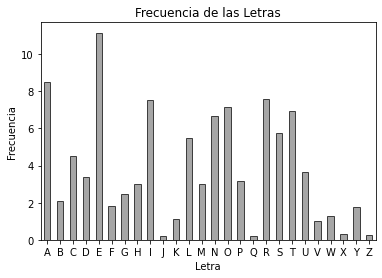

In [10]:
df2["Frequency"].plot(kind="bar", color="gray",alpha=.7, edgecolor="black")
plt.ylabel("Frecuencia")
plt.xlabel("Letra")
plt.title("Frecuencia de las Letras")
plt.xticks(rotation=0,fontsize=10);

- Es posible apreciar claramente que la letra mas utilizada es la "E"

**Utilizar Python o SQL para mostrar las 5 letras más comunes junto con sus frecuencias y proporciones**

In [11]:
df.sort_values(["Frequency"], ascending=False).head()

,Letter,Frequency,Proportion
4,E,11.1607,56.88
0,A,8.4966,43.31
17,R,7.5809,38.64
8,I,7.5448,38.45
14,O,7.1635,36.51


**Utilizar Python o SQL para mostrar las 5 letras menos comunes junto con sus frecuencias y proporciones**

In [12]:
df.sort_values(["Frequency"], ascending=True).head()

,Letter,Frequency,Proportion
16,Q,0.1962,1.00
9,J,0.1965,1.00
25,Z,0.2722,1.39
23,X,0.2902,1.48
21,V,1.0074,5.13


Con la ayuda del metodo .sort_values y el parametro ascending, podemos ordenar el conjunto de datos segun la columna "Frequency" de forma descendente o ascendente dependiendo si es True o False. Mientras que .head() por defecto nos mostrara 5 registros.

**Filtrar el conjunto de datos para mostrar solo filas para vocales (A, E, I, O, U)**

In [13]:
vocales = df["Letter"].isin(["A","E","I","O","U"])
df[vocales]

,Letter,Frequency,Proportion
0,A,8.4966,43.31
4,E,11.1607,56.88
8,I,7.5448,38.45
14,O,7.1635,36.51
20,U,3.6308,18.51


**Fin parte 1**

### I.- Análisis Exploratorio Parte **2**

In [5]:
#librerias
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

AttributeError: module 'numpy' has no attribute 'float'

In [5]:

df1 = pd.read_csv("/content/drive/MyDrive/Data CodingDojo/train.csv")
df2 = pd.read_csv("/content/drive/MyDrive/Data CodingDojo/test.csv")


In [ ]:
# Es

In [6]:
df = pd.concat([df1, df2], axis=0)

In [20]:
df.head()

,letter,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
X = df.drop(columns="letter")

y = df["letter"]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)

In [9]:
input_shape = X_train.shape[1]
input_shape

784

In [10]:
model = Sequential()

In [11]:
model.add(Dense(784, input_dim = input_shape,activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(26, activation = 'softmax'))
model.compile(loss = 'bce', optimizer = 'adam', metrics="accuracy")

In [ ]:
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test), 
                    epochs=5)

In [ ]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();

**Visualizaciones**

### II.- Modelos


## Conclusiones

* Conclusión 01
* Conclusión 02
* ...

## Referencias

* [Curso MAT281_2022](https://github.com/fralfaro/MAT281_2022)
* [Curso CodingDojo-DataScience](https://github.com/fralfaro/CodingDojo-DataScience)
* [Plataforma CodingDojo-DataScience](https://login.codingdojo.com/)